In [2]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
import numpy as np

In [4]:
boston = load_boston()

Data is x axis, Target is y axis

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [8]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [9]:
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
profile = ProfileReport(df)

In [12]:
profile.to_file('boston_profile.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]


In [12]:
df['target'] = boston.target

In [13]:
df.shape

(506, 14)

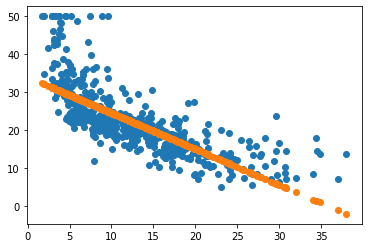

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df.LSTAT, df.target)
plt.scatter(df.LSTAT, -.95*df.LSTAT + 34)


# lets learn the first model

In [16]:
from sklearn.linear_model import LinearRegression

In [21]:
x = df.LSTAT; y = df.target

In [18]:
lr = LinearRegression()

In [22]:
x.values.shape

(506,)

In [25]:
x = x.values.reshape(-1,1)
y = y.values

In [27]:
lr.fit(x, y)

LinearRegression()

In [28]:
lr.coef_

array([-0.95004935])

In [29]:
lr.intercept_

34.5538408793831

In [30]:
lr.score(x, y)

0.5441462975864797

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
yhat = lr.predict(x)

In [34]:
mean_absolute_error(y, yhat)

4.505281166250568

In [35]:
np.sqrt(mean_squared_error(y, yhat))

6.20346413142642

# split train, test

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#This shuffles data records
df = df.sample(frac=1)

In [48]:
train, test = train_test_split(df, test_size=.2)

In [49]:
train.shape, test.shape

((404, 14), (102, 14))

In [50]:
train_cols = ['LSTAT', 'RM']
target_col = 'target'
xtrain = train[train_cols]
xtest = test[train_cols]
ytrain = train[target_col]
ytest = test[target_col]

In [41]:
from sklearn.linear_model import Ridge

In [51]:
r = Ridge(alpha=1) # Fit least square error regression (multivariate) with L2-Regularization (alpha)

In [52]:
r.fit(xtrain, ytrain)

Ridge(alpha=1)

In [53]:
yhat_test = r.predict(xtest)

In [54]:
yhat_test.shape

(102,)

In [55]:
r2_score(ytest, yhat_test), mean_absolute_error(ytest, yhat_test)

(0.7142935474251195, 3.757514136429129)

In [56]:
r.coef_, r.intercept_

(array([-0.66211854,  4.67942972]), 1.606901213603841)

# Normalization

In [57]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [58]:
scaler = RobustScaler()

In [60]:
xtrain = scaler.fit_transform(xtrain)

In [61]:
scaler.center_, scaler.scale_

(array([11.395,  6.214]), array([9.6125, 0.745 ]))

In [62]:
xtest = scaler.transform(xtest)

In [63]:
r = Ridge()

In [64]:
r.fit(xtrain, ytrain)
# Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
# normalize = False, random_state = None, solver = 'auto', tol = 0.001)


Ridge()

In [67]:
r.score(xtest, ytest)

0.7148222941437827

# Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

In [81]:
scores= cross_val_score(estimator=LinearRegression(), X=xtrain, y=ytrain, cv=5)

In [82]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.57 accuracy with a standard deviation of 0.12


In [70]:
cross_validate()

TypeError: cross_validate() missing 2 required positional arguments: 'estimator' and 'X'

In [56]:
cross_val_predict()

TypeError: cross_val_predict() missing 2 required positional arguments: 'estimator' and 'X'